# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl   # We'll use the matplotlib.colors library to color our data points
%matplotlib inline 

In [2]:
df_new = pd.read_csv("oh_table.csv")

In [3]:
df_new.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [4]:
df = df_new.loc[df_new["group_id"] == 2]

In [5]:
print(len(df))

118


In [6]:
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
276,38,46975431705914112,HIP 19504,62.677046,18.423125,21.3141,46.969,6.477,5.795,NaN,NaN,NaN,2,118
277,1359,38354676428572288,HIP 18322,58.756565,12.485544,21.8224,45.847,9.676,8.181,NaN,NaN,NaN,2,118
278,1438,315377867997367936,HIP 6978,22.465132,31.007339,23.0783,43.348,7.705,6.682,NaN,NaN,NaN,2,118
279,1615,43538289638888064,HIP 18327,58.777732,16.998376,24.6359,40.605,8.674,7.413,NaN,NaN,NaN,2,118
280,1624,43789768566924416,HIP 17962,57.604583,17.246416,21.0262,47.675,9.126,7.776,NaN,NaN,NaN,2,118


## .loc[ ] indexing

In [7]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [8]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
zeros = sample_df["column 1"].loc

In [9]:
sample_df20 = sample_df.loc[sample_df["column 1"] < 30]
sample_df20.head()

,column 1,column 2
0,20,0
2,15,1
6,10,1


Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [10]:
same_line = sample_df.loc[sample_df["column 2"] == 1]
same_line.head()

,column 1,column 2
1,50,1
2,15,1
3,50,1
6,10,1


Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [11]:
five = sample_df.loc[sample_df["column 1"] == 50]
five.head()

,column 1,column 2
1,50,1
3,50,1
5,50,0


#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [12]:
# You can use this function in your code to find the log of distance:

# np.log10()

df["Absolute Magnitude"] = df["G"]-5 * np.log10(df["distance"]) + 5
df.head()

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,Absolute Magnitude
276,38,46975431705914112,HIP 19504,62.677046,18.423125,21.3141,46.969,6.477,5.795,NaN,NaN,NaN,2,118,3.117943
277,1359,38354676428572288,HIP 18322,58.756565,12.485544,21.8224,45.847,9.676,8.181,NaN,NaN,NaN,2,118,6.369445
278,1438,315377867997367936,HIP 6978,22.465132,31.007339,23.0783,43.348,7.705,6.682,NaN,NaN,NaN,2,118,4.520155
279,1615,43538289638888064,HIP 18327,58.777732,16.998376,24.6359,40.605,8.674,7.413,NaN,NaN,NaN,2,118,5.631102
280,1624,43789768566924416,HIP 17962,57.604583,17.246416,21.0262,47.675,9.126,7.776,NaN,NaN,NaN,2,118,5.734546


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [13]:
df["G-J"] = df["G"] - df["J"]
g_j = df["G-J"]
df.head()

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,Absolute Magnitude,G-J
276,38,46975431705914112,HIP 19504,62.677046,18.423125,21.3141,46.969,6.477,5.795,NaN,NaN,NaN,2,118,3.117943,0.682
277,1359,38354676428572288,HIP 18322,58.756565,12.485544,21.8224,45.847,9.676,8.181,NaN,NaN,NaN,2,118,6.369445,1.495
278,1438,315377867997367936,HIP 6978,22.465132,31.007339,23.0783,43.348,7.705,6.682,NaN,NaN,NaN,2,118,4.520155,1.023
279,1615,43538289638888064,HIP 18327,58.777732,16.998376,24.6359,40.605,8.674,7.413,NaN,NaN,NaN,2,118,5.631102,1.261
280,1624,43789768566924416,HIP 17962,57.604583,17.246416,21.0262,47.675,9.126,7.776,NaN,NaN,NaN,2,118,5.734546,1.350


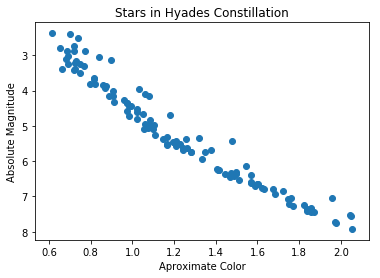

In [14]:
plt.scatter(g_j,df["Absolute Magnitude"]) 
plt.xlabel("Aproximate Color")
plt.ylabel("Absolute Magnitude")
plt.title("Stars in Hyades Constillation")
plt.gca().invert_yaxis()
plt.show()


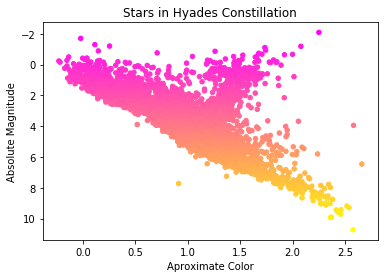

In [15]:
df_new["Absolute Magnitude"] = df_new["G"]-5 * np.log10(df_new["distance"]) + 5
cm = plt.cm.get_cmap("spring")
plt.scatter(df_new["G"]- df_new["J"],df_new["Absolute Magnitude"],cmap=cm, c = df_new["Absolute Magnitude"], s = 20) 
plt.xlabel("Aproximate Color")
plt.ylabel("Absolute Magnitude")
plt.title("Stars in Hyades Constillation")
plt.gca().invert_yaxis()
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

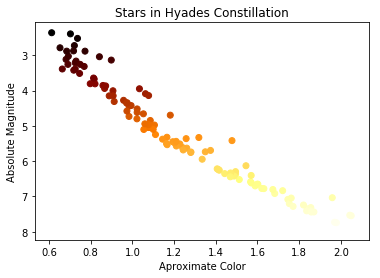

In [16]:
cm = plt.cm.get_cmap("afmhot")
plt.scatter(g_j,df["Absolute Magnitude"],cmap= cm, c = df["Absolute Magnitude"]) 
plt.xlabel("Aproximate Color")
plt.ylabel("Absolute Magnitude")
plt.title("Stars in Hyades Constillation")
plt.gca().invert_yaxis()
plt.show()


### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

(array([ 8., 12., 10., 12., 15., 17.,  8., 16., 11.,  9.]),
 array([2.36242757, 2.91952107, 3.47661457, 4.03370807, 4.59080157,
        5.14789507, 5.70498858, 6.26208208, 6.81917558, 7.37626908,
        7.93336258]),
 <a list of 10 Patch objects>)

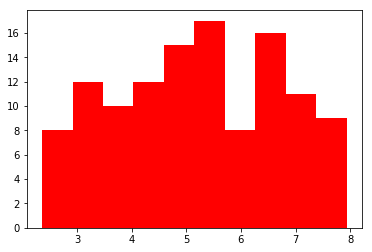

In [17]:
plt.hist(df["Absolute Magnitude"], color = "red")

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([17., 12., 14., 19., 12., 10., 12.,  7.,  8.,  6.]),
 array([0.613 , 0.7572, 0.9014, 1.0456, 1.1898, 1.334 , 1.4782, 1.6224,
        1.7666, 1.9108, 2.055 ]),
 <a list of 10 Patch objects>)

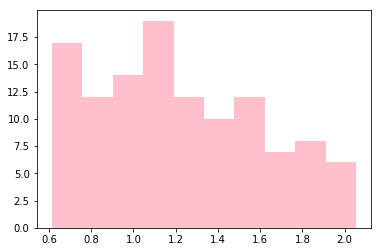

In [18]:
plt.hist(g_j, color = "pink")

(array([ 2.,  4.,  4., 17., 53., 19., 11.,  2.,  5.,  1.]),
 array([31.478 , 34.7783, 38.0786, 41.3789, 44.6792, 47.9795, 51.2798,
        54.5801, 57.8804, 61.1807, 64.481 ]),
 <a list of 10 Patch objects>)

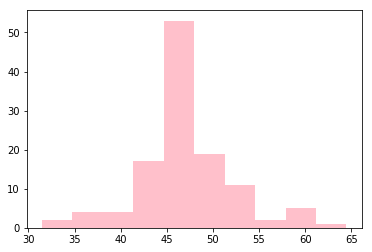

In [19]:
plt.hist(df["distance"], color = "pink")